In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

In [3]:
#Coletando dados 


df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Desagreg Abrotea_art e Abrotea_ind - RJ_Reconstrucao_Gadiformes_2024_10_30.xlsx')
df_Abrotea_verdadeira_art = pd.DataFrame(df[['Ano','Abrotea_verdadeira_art']])

dados = df_Abrotea_verdadeira_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1989,1990,1991,1992,1993,1994,1995,1998,1999,2000,2011,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Abrotea_verdadeira_art'].values
dados.head()

,Ano,Abrotea_verdadeira_art
26,1976,3.531108
27,1977,3.382635
38,1988,5.000000
46,1996,0.500000
47,1997,5.000000


In [4]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [8]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrotea_verdadeira/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/200


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step - loss: 0.9954
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9659
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9400
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9106
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8779
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8419
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8022
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7607
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7207
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6872
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6660
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6592
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6577
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6545
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6507
Epoch 16/200
1/1 ━━━━━━━━━━━━━

In [6]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrotea_verdadeira/pesos pesca art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[2.414647 ]
 [2.4487593]
 [2.4825718]
 [2.5168328]
 [2.5510955]
 [2.586024 ]
 [2.6212502]
 [2.6564767]
 [2.6917014]
 [2.7269258]
 [2.7638285]
 [2.8053036]
 [2.849346 ]
 [2.893389 ]
 [2.937513 ]
 [2.9817057]
 [3.0263753]
 [3.0755258]
 [3.1268117]
 [3.1791995]
 [3.2336845]
 [3.2881703]
 [3.342558 ]
 [3.3971603]
 [3.452108 ]
 [3.5101132]
 [3.7259734]
 [3.8420548]
 [3.9712033]
 [4.100368 ]
 [4.2295294]
 [4.3591223]
 [4.488265 ]
 [4.616847 ]
 [4.7268267]
 [4.769649 ]
 [4.5522494]
 [4.378574 ]
 [4.2049017]
 [4.0312266]
 [3.8575532]
 [3.6838794]
 [3.5102482]
 [3.008819 ]
 [2.8458796]
 [2.6829395]
 [1.5052712]
 [1.8365754]]


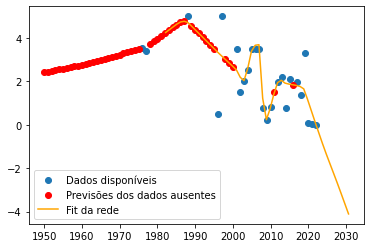

In [9]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

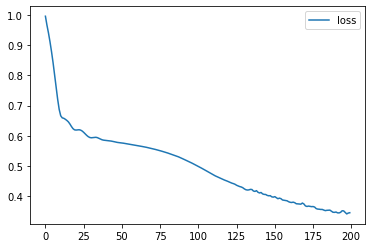

In [10]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [11]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Abrotea_verdadeira_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrotea_verdadeira/Interpolações e Extrapolações Abrotea_verdadeira_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Abrotea_verdadeira_art
0,1950,2.414647
1,1951,2.448759
2,1952,2.482572
3,1953,2.516833
4,1954,2.551095
...,...,...
62,2012,1.991301
63,2013,2.022369
64,2014,1.901824
65,2015,1.868106
